In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [111]:
# Veri kümesi
df = pd.read_csv("./data.csv")

In [112]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    object 
 3   texture_mean             569 non-null    object 
 4   perimeter_mean           567 non-null    object 
 5   area_mean                567 non-null    object 
 6   smoothness_mean          569 non-null    object 
 7   compactness_mean         569 non-null    object 
 8   concavity_mean           569 non-null    object 
 9   concave points_mean      568 non-null    object 
 10  symmetry_mean            567 non-null    object 
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    object 
 13  texture_se               569 non-null    object 
 14  perimeter_se             5

In [113]:
print(df.shape)

(569, 32)


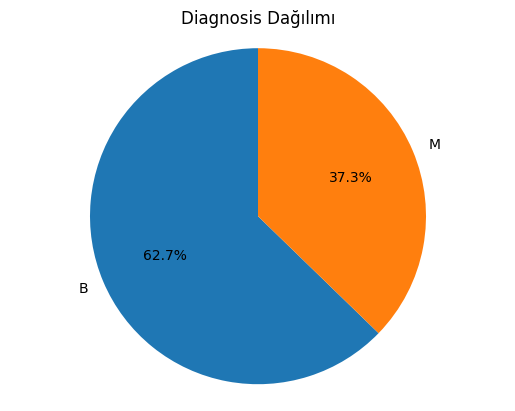

In [114]:
# Diagnosis sütununun değerine göre sayıları
diagnosis_counts = df["diagnosis"].value_counts()

# Dairesel grafik Dağlımı M(Kötü huylu tümör) B(iyi huylu tümör)
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Diagnosis Dağılımı")
plt.show()

In [115]:
# O ları 0 , I ları 1 yapmak için float64 olanları Object tibine dönüştürdüm
for column in df.columns:
    if df[column].dtype == "float64":
       df[column] = df[column].astype("object")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       569 non-null    int64 
 1   diagnosis                569 non-null    object
 2   radius_mean              569 non-null    object
 3   texture_mean             569 non-null    object
 4   perimeter_mean           567 non-null    object
 5   area_mean                567 non-null    object
 6   smoothness_mean          569 non-null    object
 7   compactness_mean         569 non-null    object
 8   concavity_mean           569 non-null    object
 9   concave points_mean      568 non-null    object
 10  symmetry_mean            567 non-null    object
 11  fractal_dimension_mean   569 non-null    object
 12  radius_se                569 non-null    object
 13  texture_se               569 non-null    object
 14  perimeter_se             568 non-null    o

In [116]:
# O ları 0 , I ları 1 yapma
for column in df.columns:
    df[column] = df[column].replace({'O': '0', 'I': '1'}, regex=True)

In [117]:
# (",") leri (".") yapma
def replace_commas_with_dots(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].str.replace(",", ".")
    return df


df = replace_commas_with_dots(df.copy())

In [118]:
#dignosis ve id sütunu hariç floata çevirdim
for i in range(2,df.shape[1]):
    df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                567 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            567 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

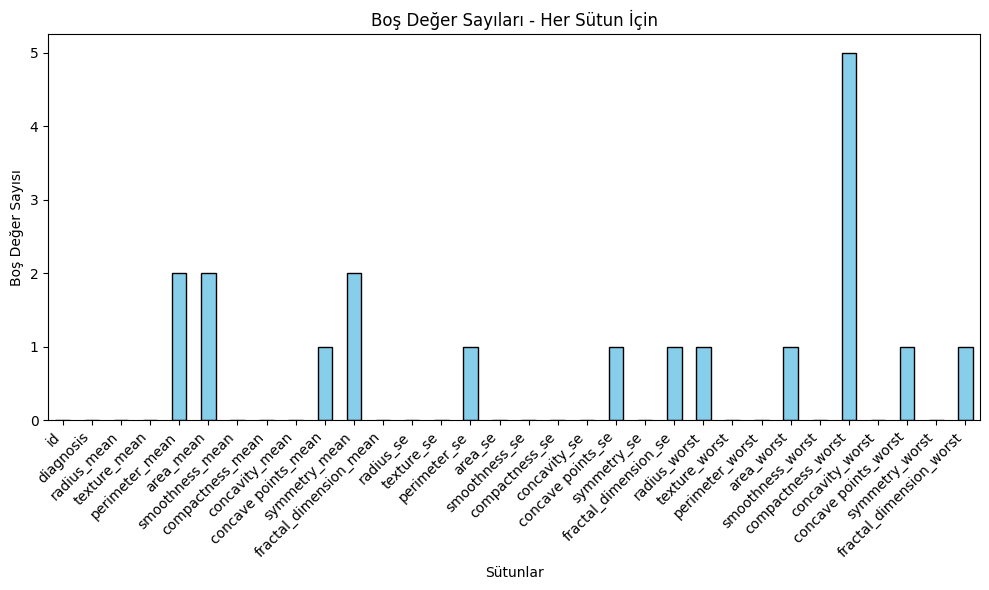

In [119]:
# NaN değererin sayısı sütun bazlı
missing_values = df.isna().sum()
missing_values.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Boş Değer Sayıları - Her Sütun İçin')
plt.xlabel('Sütunlar')
plt.ylabel('Boş Değer Sayısı')
plt.xticks(rotation=45, ha='right')  # Sütun etiketlerini döndürme
plt.tight_layout()
plt.show()

In [120]:
# Sadece sayısal sütunları seç
numerical_columns = df.select_dtypes(include=['float64']).columns

# Kötü huylu iyi huylu tümöre göre ortalama hesaplama
means_by_diagnosis = df.groupby("diagnosis")[numerical_columns].mean()
# Transpose işlemi
means_by_diagnosis = means_by_diagnosis.transpose()
print(means_by_diagnosis.to_string())

diagnosis                         B            M
radius_mean               12.146524    17.462830
texture_mean              17.914762    21.604906
perimeter_mean            78.075406   115.520048
area_mean                462.483989   979.957346
smoothness_mean           43.115004    59.402658
compactness_mean          35.588609     7.315709
concavity_mean            42.190003    26.737373
concave points_mean       32.133070    37.636424
symmetry_mean              4.092240     6.401542
fractal_dimension_mean    65.601529    62.104519
radius_se                 22.958942    42.259741
texture_se                36.781057    28.651371
perimeter_se              57.624225   160.723976
area_se                   21.135148    72.672406
smoothness_se             41.962549    70.563052
compactness_se            27.688648    25.017528
concavity_se              31.432529    27.468445
concave points_se         45.508017    35.655019
symmetry_se               22.573941    16.331892
fractal_dimension_se

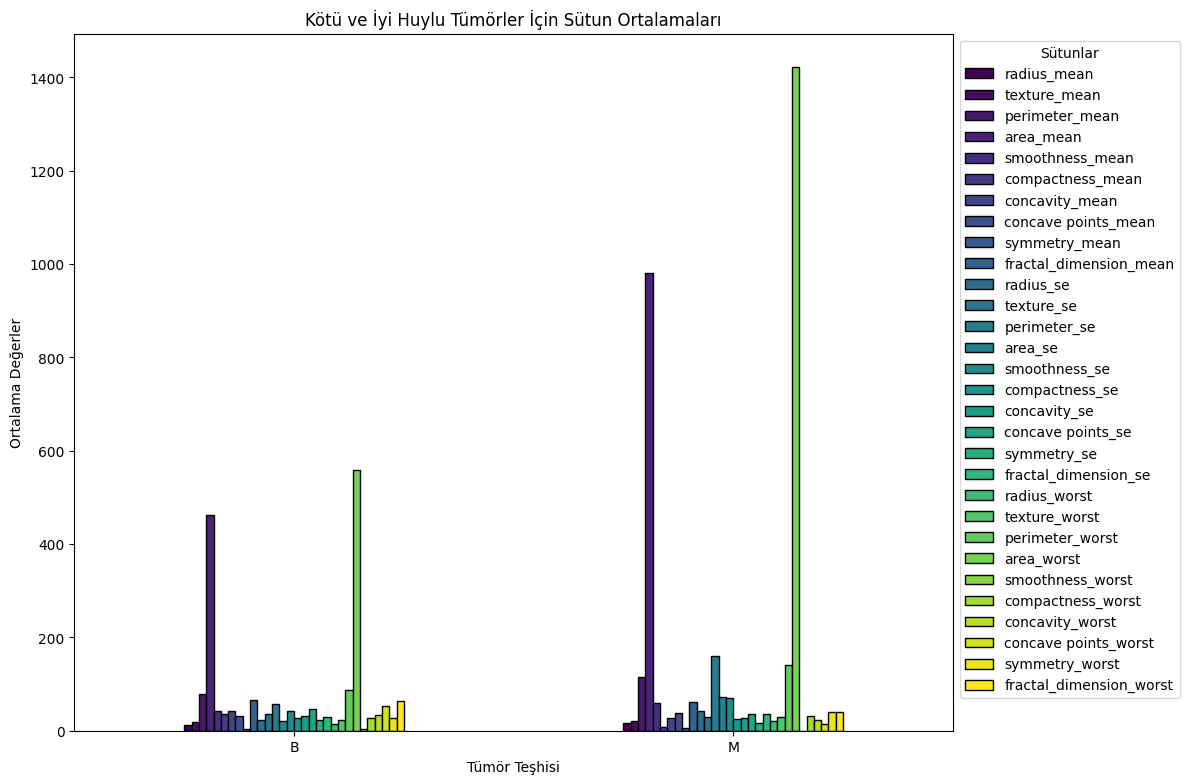

In [121]:
# Sayısal sütunları kullanarak gruplama ve ortalama hesaplama
means_by_diagnosis = df.groupby("diagnosis")[numerical_columns].mean()

# Ortalama değerlere göre çubuk grafik çizimi
means_by_diagnosis.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')
plt.title('Kötü ve İyi Huylu Tümörler İçin Sütun Ortalamaları')
plt.xlabel('Tümör Teşhisi')
plt.ylabel('Ortalama Değerler')
plt.xticks(rotation=0)
plt.legend(title='Sütunlar', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [122]:
# NaN değerleri doldur
for diagnosis in ["B", "M"]:
    for column in numerical_columns:
        # NaN değerlerini, ilgili teşhis ve sütunun ortalamasıyla doldur
        df.loc[df["diagnosis"] == diagnosis, column] = df.loc[df["diagnosis"] == diagnosis, column].fillna(means_by_diagnosis.loc[diagnosis, column])

# Kontrol için NaN değerleri say
nan_counts_after_fillna = df[numerical_columns].isna().sum()
print(nan_counts_after_fillna)

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [123]:
X = df[numerical_columns]
y = df["diagnosis"].map({"B": 0, "M": 1})

In [124]:
#  Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train setini tekrar train ve validation setlerine bölelim
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [125]:
# Veriyi ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [126]:
# Modelleri tanımla
models = [
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Support Vector Machine", SVC(kernel="linear", C=1.0)),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Naive Bayes", GaussianNB())
]

In [127]:
# Model performanslarını Validation
results = {"Model": [], "F1 Score": [], "Precision": [], "Recall": [], "Accuracy": []}

In [128]:
#  Model performanslarını test
test_results = {"Model": [], "F1 Score": [], "Precision": [], "Recall": [], "Accuracy": [], "Confusion Matrix": []}

## **Validation data set değerlendirmesi **

In [129]:
for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    #val
    y_pred = model.predict(X_val_scaled)
    # test
    y_pred_test = model.predict(X_test_scaled)
    #val
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)


    results["Model"].append(model_name)
    results["F1 Score"].append(f1)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["Accuracy"].append(accuracy)

    #test
    f1_test = f1_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    cm = confusion_matrix(y_test, y_pred_test)

    test_results["Model"].append(model_name)
    test_results["F1 Score"].append(f1_test)
    test_results["Precision"].append(precision_test)
    test_results["Recall"].append(recall_test)
    test_results["Accuracy"].append(accuracy_test)
    test_results["Confusion Matrix"].append(cm)

In [130]:
# Sonuçları DataFrame'e çevirme
results_df = pd.DataFrame(results)

In [131]:
# Her bir modelin test setindeki performanslarını yazdırma
for index, row in results_df.iterrows():
    print(f"{row['Model']} Modeli validation Seti Performansı:")
    print(f"F1 Score: {row['F1 Score']:.4f}")
    print(f"Precision: {row['Precision']:.4f}")
    print(f"Recall: {row['Recall']:.4f}")
    print(f"Accuracy: {row['Accuracy']:.4f}")
    print("\n" + "="*50 + "\n")

K-Nearest Neighbors Modeli validation Seti Performansı:
F1 Score: 0.8810
Precision: 0.9250
Recall: 0.8409
Accuracy: 0.9123


Random Forest Modeli validation Seti Performansı:
F1 Score: 0.9438
Precision: 0.9333
Recall: 0.9545
Accuracy: 0.9561


Gradient Boosting Modeli validation Seti Performansı:
F1 Score: 0.9438
Precision: 0.9333
Recall: 0.9545
Accuracy: 0.9561


Logistic Regression Modeli validation Seti Performansı:
F1 Score: 0.9451
Precision: 0.9149
Recall: 0.9773
Accuracy: 0.9561


Support Vector Machine Modeli validation Seti Performansı:
F1 Score: 0.9451
Precision: 0.9149
Recall: 0.9773
Accuracy: 0.9561


Decision Tree Modeli validation Seti Performansı:
F1 Score: 0.9318
Precision: 0.9318
Recall: 0.9318
Accuracy: 0.9474


Naive Bayes Modeli validation Seti Performansı:
F1 Score: 0.9091
Precision: 0.9091
Recall: 0.9091
Accuracy: 0.9298




## Test seti değerlendirmesi

In [132]:
# Test seti üzerinde performansları DataFrame'e çevirme
test_results_df = pd.DataFrame(test_results)

In [133]:
# Her bir modelin test setindeki performanslarını yazdırma
for index, row in test_results_df.iterrows():
    print(f"{row['Model']} Modeli Test Seti Performansı:")
    print(f"F1 Score: {row['F1 Score']:.4f}")
    print(f"Precision: {row['Precision']:.4f}")
    print(f"Recall: {row['Recall']:.4f}")
    print(f"Accuracy: {row['Accuracy']:.4f}")
    print("\n" + "="*50 + "\n")

K-Nearest Neighbors Modeli Test Seti Performansı:
F1 Score: 0.8395
Precision: 0.8947
Recall: 0.7907
Accuracy: 0.8860


Random Forest Modeli Test Seti Performansı:
F1 Score: 0.9512
Precision: 1.0000
Recall: 0.9070
Accuracy: 0.9649


Gradient Boosting Modeli Test Seti Performansı:
F1 Score: 0.9412
Precision: 0.9524
Recall: 0.9302
Accuracy: 0.9561


Logistic Regression Modeli Test Seti Performansı:
F1 Score: 0.9302
Precision: 0.9302
Recall: 0.9302
Accuracy: 0.9474


Support Vector Machine Modeli Test Seti Performansı:
F1 Score: 0.9195
Precision: 0.9091
Recall: 0.9302
Accuracy: 0.9386


Decision Tree Modeli Test Seti Performansı:
F1 Score: 0.9412
Precision: 0.9524
Recall: 0.9302
Accuracy: 0.9561


Naive Bayes Modeli Test Seti Performansı:
F1 Score: 0.8989
Precision: 0.8696
Recall: 0.9302
Accuracy: 0.9211




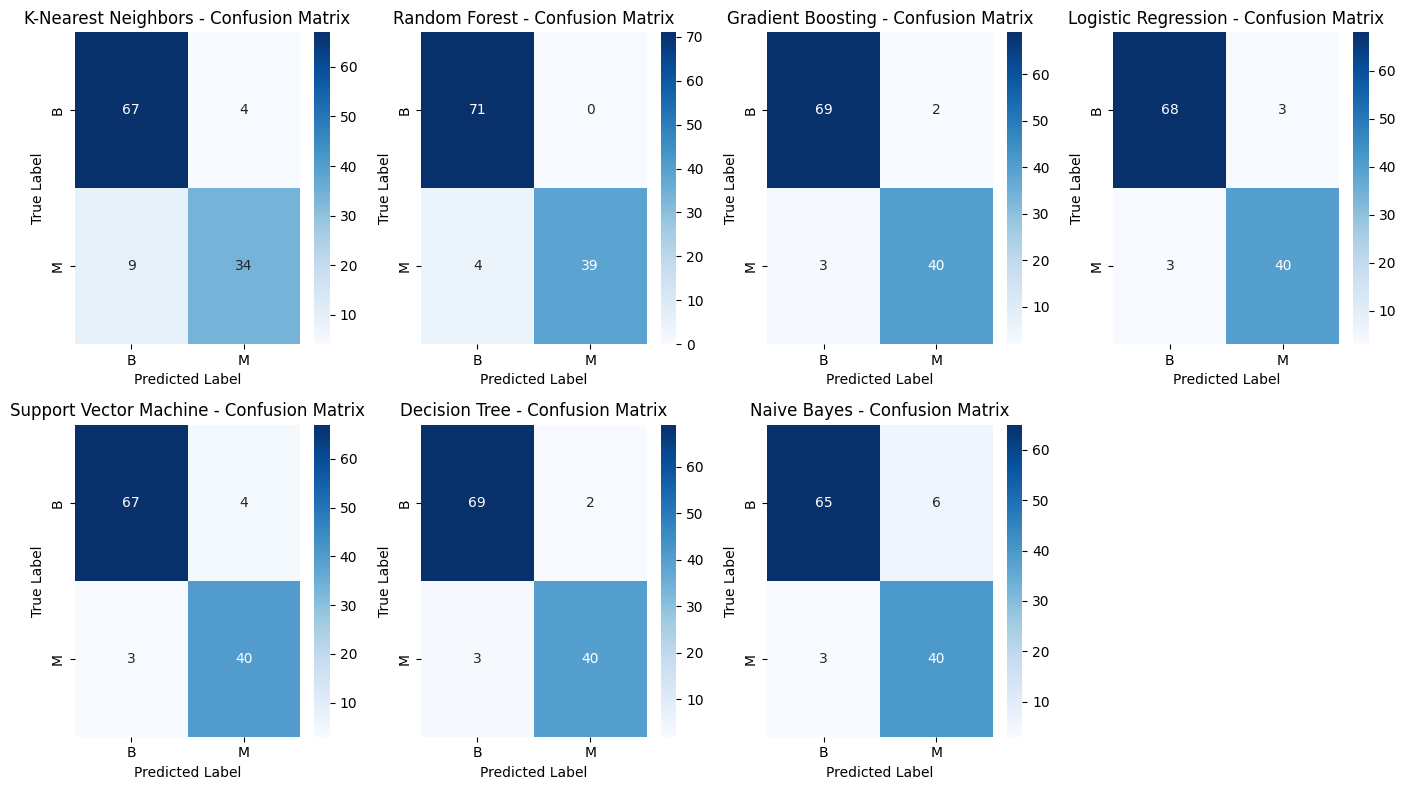

In [134]:
plt.figure(figsize=(14, 8))
for i, model_name in enumerate(test_results_df["Model"]):
    plt.subplot(2, 4, i + 1)
    sns.heatmap(test_results_df.loc[i, "Confusion Matrix"], annot=True, fmt="d", cmap="Blues",
                xticklabels=["B", "M"], yticklabels=["B", "M"])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

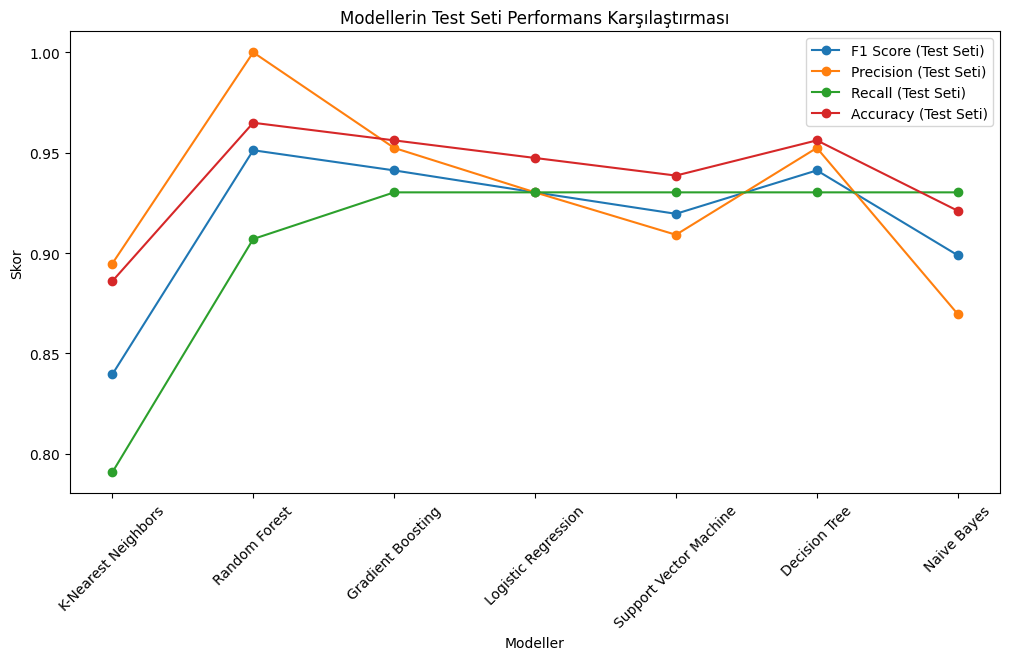

In [135]:
# Her bir modelin test setindeki performanslarını görselleştirme
plt.figure(figsize=(12, 6))
for metric in ["F1 Score", "Precision", "Recall", "Accuracy"]:
    plt.plot(test_results_df["Model"], test_results_df[metric], marker='o', label=metric + ' (Test Seti)')

plt.title('Modellerin Test Seti Performans Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Skor')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [136]:
# Modellerin en iyi olduğu metrikleri yazdırma
best_f1_model = test_results_df.loc[test_results_df["F1 Score"].idxmax()]["Model"]
best_precision_model = test_results_df.loc[test_results_df["Precision"].idxmax()]["Model"]
best_recall_model = test_results_df.loc[test_results_df["Recall"].idxmax()]["Model"]
best_accuracy_model = test_results_df.loc[test_results_df["Accuracy"].idxmax()]["Model"]

print(f"En iyi F1 Score Modeli: {best_f1_model}")
print(f"En iyi Precision Modeli: {best_precision_model}")
print(f"En iyi Recall Modeli: {best_recall_model}")
print(f"En iyi Accuracy Modeli: {best_accuracy_model}")

En iyi F1 Score Modeli: Random Forest
En iyi Precision Modeli: Random Forest
En iyi Recall Modeli: Gradient Boosting
En iyi Accuracy Modeli: Random Forest
